In [149]:
XLABEL = "Years"
YLABEL = "SDII (mm)"
TITLE = "Simple Precipitation Intensity Index"
FILE_PATH = "SDII.csv"
START_YEAR = 1950
END_YEAR = 2010

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Mount Google Drive to access files (if your CSV file is in Google Drive)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
# Load the CSV file into a pandas DataFrame
file_path = "/content/drive/MyDrive/GMB/" + FILE_PATH  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

In [152]:
# Assuming you have a column named 'X' and another column named 'Y'
x_values = df['a']
y_values_a = df['c']
y_values_b = df['b']

# Extract the desired subset for the years X1 to X2
subset_mask = (df['a'] >= START_YEAR) & (df['a'] <= END_YEAR)

x_values = df['a'][subset_mask]
y_values_a = df['c'][subset_mask]
y_values_b = df['b'][subset_mask]

In [153]:
print("from ", end="")
print(list(x_values)[0], end="")
print(" to ", end="")
print(list(x_values).pop())

from 1950 to 2010


In [154]:
def numbers_ending_with_zero(input_list):
    """
    Filter numbers from the input list that end with zero.

    Parameters:
    - input_list (list): List of numbers.

    Returns:
    - list: List containing numbers ending with zero.
    """
    return [num for num in input_list if num % 10 == 0]

# Example usage:
x_values_on_graph = numbers_ending_with_zero(list(x_values))


print(x_values_on_graph)

[1950, 1960, 1970, 1980, 1990, 2000, 2010]


In [155]:
vertical_lines = [1955, 1969, 1985, 1997, 2000, 2010]

In [156]:
def get_y_value_for_year(year, x_values, y_values):

    # Ensure that x_values are sorted
    sorted_points = sorted(zip(x_values, y_values))
    sorted_x_values, sorted_y_values = zip(*sorted_points)

    # Find the index of the year in the sorted_x_values
    try:
        index = sorted_x_values.index(year)
        y_value = sorted_y_values[index]
        return y_value
    except ValueError:
        print(f"No data for the year {year}.")
        return None

In [157]:
# Sample data (replace these with your actual data)
years = np.arange(1950, 2011).reshape(-1, 1)  # Years from 1955 to 2010
precipitation = np.array(y_values_a)  # Replace with your precipitation values
# Create linear regression model
model = LinearRegression()

# Fit the model for the years 1955 to 2010
model.fit(years, precipitation)

# Print the equation of the regression line
slope = model.coef_[0]
intercept = model.intercept_

equation = f"y = {slope:.2f}x + {intercept:.2f}"
print("Regression Equation:", equation)

Regression Equation: y = -0.06x + 128.59


In [158]:
# Calculate R-squared value
r_squared = model.score(years, precipitation)

# Print R-squared value
print("R-squared:", r_squared)

R-squared: 0.39852086166399825


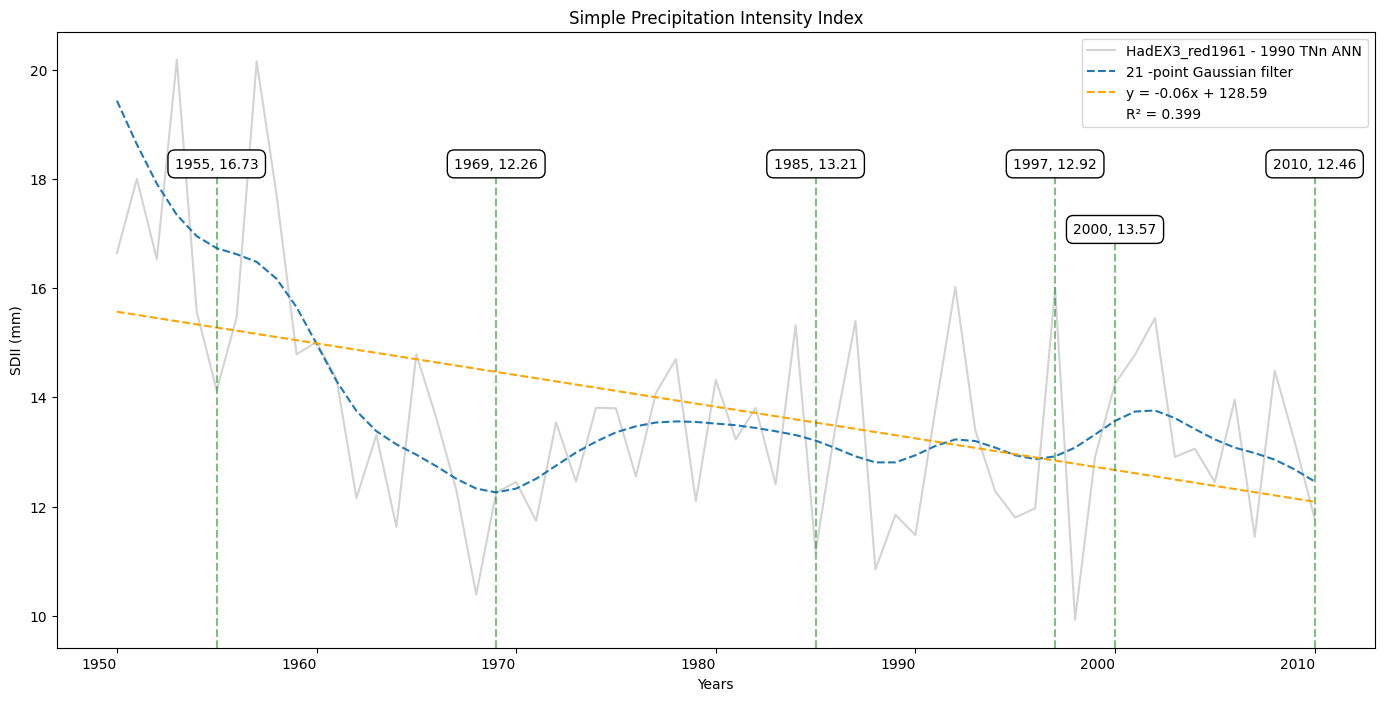

In [164]:
# Create a figure with a specific size
plt.figure(figsize=(17, 8))  # Adjust width and height as needed


# Plot the data for 'Column_B'
plt.plot(x_values, y_values_b, label='HadEX3_red1961 - 1990 TNn ANN', color='#D3D3D3', linestyle='-')

# Plot the data
plt.plot(x_values, y_values_a, label='21 -point Gaussian filter', linestyle='--')



regression_line = model.predict(years)
regression_line
slope = model.coef_[0]
intercept = model.intercept_



# Ensure the regression line corresponds to the subset of x_values starting from 1950
plt.plot(x_values, regression_line, label=equation, color='orange', linestyle='--')

plt.plot([], [], label=f"R\u00B2 = {round(r_squared, 3)}", color='white')



# Add labels and a title
plt.xlabel(XLABEL)
plt.ylabel(YLABEL)
plt.title(TITLE)

plt.xticks(x_values_on_graph, rotation=0, ha='right')  # Adjust rotation and spacing as needed

# Add a legend
plt.legend()

# Add vertical lines
boxes_hieght = 18.2

plt.axvline(x=1955, color='green', linestyle='--', alpha=0.5, ymax=0.8)
plt.text(1955, boxes_hieght, f'''{1955}, {get_y_value_for_year(1955, x_values, y_values_a)}''', color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


plt.axvline(x=1969, color='green', linestyle='--', alpha=0.5, ymax=0.8)
plt.text(1969, boxes_hieght, f'''{1969}, {get_y_value_for_year(1969, x_values, y_values_a)}''', color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


plt.axvline(x=1985, color='green', linestyle='--', alpha=0.5, ymax=0.8)
plt.text(1985, boxes_hieght, f'''{1985}, {get_y_value_for_year(1985, x_values, y_values_a)}''', color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


plt.axvline(x=1997, color='green', linestyle='--', alpha=0.5, ymax=0.8)
plt.text(1997, boxes_hieght, f'''{1997}, {get_y_value_for_year(1997, x_values, y_values_a)}''',  color='black', ha='center' , bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


plt.axvline(x=2000, color='green', linestyle='--', alpha=0.5, ymax=0.7)
plt.text(2000, boxes_hieght - 1.2, f'''{2000}, {get_y_value_for_year(2000, x_values, y_values_a)}''', color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


plt.axvline(x=2010, color='green', linestyle='--', alpha=0.5, ymax=0.8)
plt.text(2010, boxes_hieght, f'''{2010}, {get_y_value_for_year(2010, x_values, y_values_a)}''', color='black', ha='center', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))


# Show the plot
plt.show()


In [160]:
from PIL import Image

img_path = "/content/drive/MyDrive/GMB/GMB_IMG/"


def resize_images(images, output_size):
    resized_images = []

    for image_path in images:
        # Open the image file
        original_image = Image.open(image_path)

        # Resize the image
        resized_image = original_image.resize(output_size, Image.ANTIALIAS)

        # Append the resized image to the list
        resized_images.append(resized_image)

    return resized_images

image_paths = [
                f'{img_path}SDII.png',
                f'{img_path}Txn.png',
                f'{img_path}CSDI.png',
                f'{img_path}TNn.png',
                f'{img_path}id.png',
                f'{img_path}TXx.png',
                f'{img_path}DTR.png',
                f'{img_path}TNx.png'
               ]
output_size = (1920, 1080)  # Adjust the size as needed

resized_images = resize_images(image_paths, output_size)

# Save the resized images
for i, resized_image in enumerate(resized_images):
    resized_image.save(f'{img_path}/resized_images/resized_image_{i + 1}.png')


<ipython-input-160-3ef3643ce70b>:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = original_image.resize(output_size, Image.ANTIALIAS)


In [161]:
from PIL import Image

img_path = "/content/drive/MyDrive/GMB/GMB_IMG/resized_images/"

# Open your eight images
image1 = Image.open(f"{img_path}resized_image_1.png")
image2 = Image.open(f"{img_path}resized_image_2.png")
# Open the additional six images
image3 = Image.open(f"{img_path}resized_image_3.png")
image4 = Image.open(f"{img_path}resized_image_4.png")
image5 = Image.open(f"{img_path}resized_image_5.png")
image6 = Image.open(f"{img_path}resized_image_6.png")
image7 = Image.open(f"{img_path}resized_image_7.png")
image8 = Image.open(f"{img_path}resized_image_8.png")

# Create a new blank image with double the width and adjusted height
collage_width = image1.width * 2
collage_height = max(image1.height + image3.height + image5.height + image7.height,
                     image2.height + image4.height + image6.height + image8.height)

collage = Image.new("RGB", (collage_width, collage_height))

# Paste images onto the collage
collage.paste(image1, (0, 0))
collage.paste(image2, (image1.width, 0))

# Adjust the y-coordinate for the bottom row
y_offset_bottom = max(image1.height, image2.height)

collage.paste(image3, (0, y_offset_bottom))
collage.paste(image4, (image1.width, y_offset_bottom))
collage.paste(image5, (0, y_offset_bottom + image3.height))
collage.paste(image6, (image1.width, y_offset_bottom + image4.height))
collage.paste(image7, (0, y_offset_bottom + image3.height + image5.height))
collage.paste(image8, (image1.width, y_offset_bottom + image4.height + image6.height))

# Save the collage
collage.save(f"{img_path}output_collage.png")

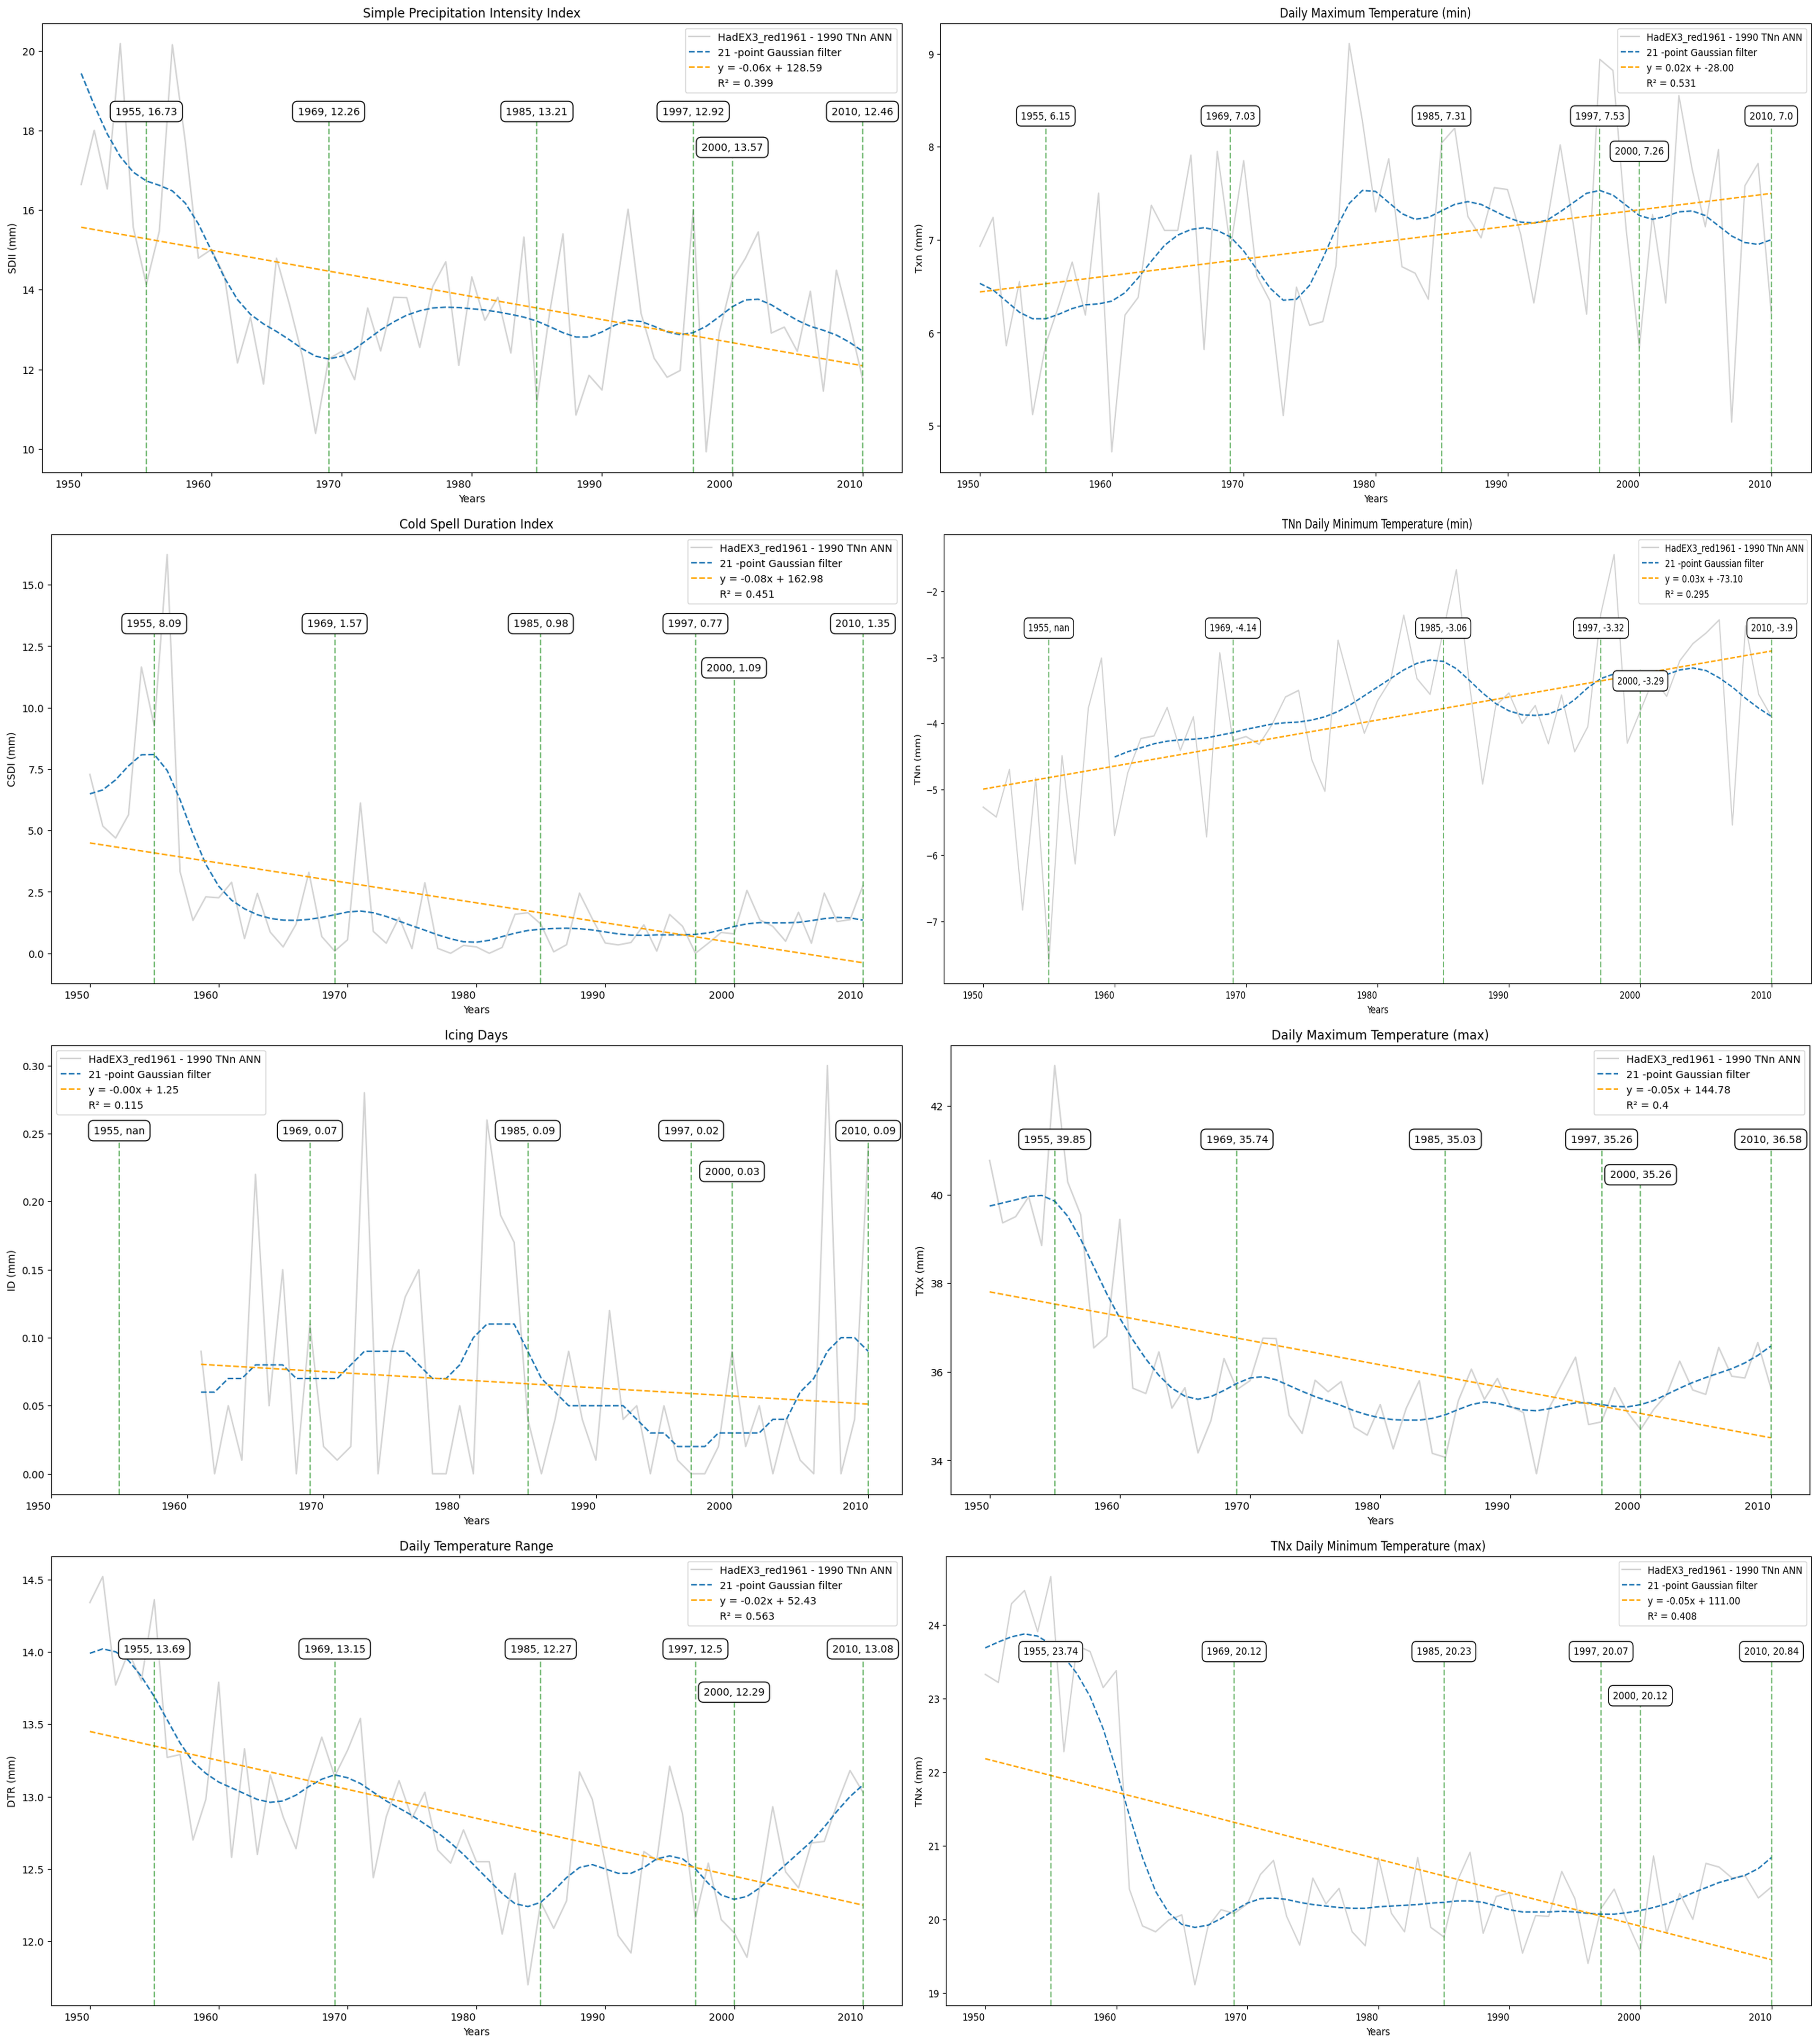

In [162]:
collage